In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.01, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM
  01 8th Hat.mid
  02 8th Ride.mid
  03 16th Snare.mid
  04 8th Ride.mid
  05 16th Ride.mid
  06 16th Ride.mid
  07 16th Ride.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  01 8th Hat.mid
  02 8th Snare.mid
  03 4th Snare .mid
  04 8th Ride.mid
  05 8th Snare.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/03 Lips n Hips 152BPM
  01 8th Perc.mid
  02 8th Ride.mid
  03 8th Ride .mid
  04 8th Snare.mid
  05 8th Snare.mid
  06 8th Hat.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM
  01 8th Snare.mid
  02 8th Cym.mid
  03 8th Ride.mid
  04 16t

  07 4th Perc.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/12 Sticks Up 155BPM
  01 8th Perc.mid
  02 8th Hat.mid
  03 16th Hat.mid
  04 8th Cym.mid
  05 8th Perc.mid
  06 8th Perc.mid
  07 8th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/13 Mid Groover 111BPM
  01 4th Hat.mid
  02 8th Hat.mid
  03 8th Cym.mid
  04 4th Cym.mid
  05 8th Toms.mid
  06 16th Cym.mid
  07 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/14 Disco Smooth 97BPM
  01 16th Hat.mid
  02 16th Cym.mid
  03 16th Hat.mid
  04 16th Toms.mid
  05 16th Cym.mid
  06 2th Snare.mid
  07 16th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/15 Tribal Shuffle 123BPM
  01 12th Hat.mid
  02 4th Hat.mid
  03 8th Toms.mid
  04 8th Cym.mid
  05 6th Hat.mid
  06 6th Hat.mid
  07 8th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/16 Medium Flow 120BPM
  01 16th Hat.mid
  02 16th Cym.mid
  03 8th Hat.mid
  04 16th Perc.mid
  05 1


Encoding midi-data
 1000
> -> multi-track = True none


In [6]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [7]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

In [8]:
genres[0][-2:]

["01 Rock'n'Roll", '01 Dancin Rick 166BPM']

In [9]:
dn = config.dataset_dir + 'drum_midi/' + '50´s Drummer MIDI Files'
# for a in os.walk(config.dataset_dir + 'drum_midi'):
#     print(a)
sorted(os.listdir(dn))

['.DS_Store',
 "01 Rock'n'Roll",
 '02 Blues',
 '03 Traditional Pop',
 '04 Country',
 '05 Jazz',
 '06 Soul - Funk',
 '07 Indie']

In [10]:
unique_genres = set(genre[-2] +'/'+ genre[-1] for genre in genres)
len(unique_genres)

110

In [11]:
unique_genres

{'01 Rock n Roll/01 Shuffle 186BPM',
 '01 Rock n Roll/02 Straight 150BPM',
 '01 Rock n Roll/03 Chucky 140BPM',
 '01 Rock n Roll/04 Deddley 150BPM',
 '01 Rock n Roll/05 Diamond 164BPM',
 '01 Rock n Roll/06 Swingin 132BPM Triplets',
 '01 Rock n Roll/07 Domino 167BPM',
 '01 Rock n Roll/08 Offkick 182BPM',
 '01 Rock n Roll/09 Rumblin 192BPM Triplets',
 '01 Rock n Roll/10 Uptime 112BPM',
 "01 Rock'n'Roll/01 Dancin Rick 166BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM",
 "01 Rock'n'Roll/03 Lips n Hips 152BPM",
 "01 Rock'n'Roll/04 Maybelline 233BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/07 Thwag 170BPM",
 "01 Rock'n'Roll/08 Doowoop 140bpm",
 "01 Rock'n'Roll/09 Diddeley 185bpm",
 "01 Rock'n'Roll/10 Ottis 172bpm",
 '02 Blues Rock/01 Clutch 90BPM Triplets',
 '02 Blues Rock/02 Sixeight 58BPM',
 '02 Blues Rock/03 Fire 148BPM',
 '02 Blues Rock/04 Whiteroom 112BPM',
 '02 Blues Rock/05 Bluesshuffle 116BPM',
 '02 Blues Rock/06 Straight 130BPM',
 '02

In [12]:
x_train.shape

(1000, 160, 10, 1)

In [13]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [14]:
x_test = x_train[m:]
x_train = x_train[:m]

In [15]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

In [16]:
# i = 0
# j = 399
# plot.single(x_train[i, :50,:,0])
# plot.single(x_train[j, :50,:,0])
# # plot.single(x_train[2a, :50,:,0])
# np.array(labels)[[i,j]]

In [17]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [18]:
latent_dim = 10
epsilon_std = 1.0

In [19]:
# utils.reload(models)
vae, encoder, generator = models.build(input_shape, latent_dim, epsilon_std)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/core.py:642: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `[(None, 10), (None, 10)]` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
/Users/mark/src/pattern-recognition/src/models.py:147: UserWarning: Output "decoder_model-" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder_model-" during training.
  vae.compile(optimizer='adam')


In [20]:
# vae.to_json()

In [21]:
# vae, encoder, generator = models.build(input_shape, latent_dim)

In [22]:
batch_size = 128
epochs = 1000
params = {'batch_size': batch_size, 'return_y': False}

In [23]:
# phase_mod = 0.01
# whitening = False

In [24]:
m = 500
useDataGenerator = False
# useDataGenerator = True
callbacks = []
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

x = x_train[:m]
# x = x_train
# i = [0,1, 7,8, 14,15, 399,400]
# x = x_train[i]
# x = np.concatenate([x for _ in range(10)])
print('x:', x.shape)

print('batch_size: %i' % batch_size)
print('update-iterations:', round(epochs * x.shape[0] / batch_size))
if useDataGenerator:
    datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
    history = collections.defaultdict(list)
    n_batches = datagen.__len__()
    for e in range(epochs):
        print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
        for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
            print(' Batch %i/%i' % (batch_i,n_batches))
            x_ = x_batch
            # x_ = datagen.shuffle_3rd_dim(x_)
            # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
            h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
            for k,v in h.history.items(): 
                print(' \\_%s' % k, [round(v_,) for v_ in v])
                history[k].append(v)
            if batch_i >= n_batches:
                break
else:
    h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
    history = h.history

x: (500, 160, 10, 1)
batch_size: 128
update-iterations: 3906
Train on 500 samples, validate on 100 samples
Epoch 1/1000
500/500 [==============================] - 20s 41ms/step - loss: 750.1461 - val_loss: 177.0589
Epoch 2/1000
500/500 [==============================] - 20s 40ms/step - loss: 172.5331 - val_loss: 99.9491
Epoch 3/1000
500/500 [==============================] - 20s 40ms/step - loss: 145.7643 - val_loss: 87.8910
Epoch 4/1000
500/500 [==============================] - 20s 39ms/step - loss: 140.1992 - val_loss: 86.6592
Epoch 5/1000
500/500 [==============================] - 20s 40ms/step - loss: 138.8071 - val_loss: 87.5364
Epoch 6/1000
500/500 [==============================] - 20s 41ms/step - loss: 137.8240 - val_loss: 87.2238
Epoch 7/1000
500/500 [==============================] - 21s 41ms/step - loss: 137.4174 - val_loss: 85.7365
Epoch 8/1000
500/500 [==============================] - 21s 41ms/step - loss: 137.0815 - val_loss: 85.4210
Epoch 9/1000
500/500 [==============

Epoch 76/1000
500/500 [==============================] - 17s 33ms/step - loss: 100.0702 - val_loss: 69.4379
Epoch 77/1000
500/500 [==============================] - 17s 33ms/step - loss: 99.3142 - val_loss: 67.4446
Epoch 78/1000
500/500 [==============================] - 17s 34ms/step - loss: 98.7172 - val_loss: 70.4194
Epoch 79/1000
500/500 [==============================] - 17s 33ms/step - loss: 100.0906 - val_loss: 67.9694
Epoch 80/1000
500/500 [==============================] - 17s 33ms/step - loss: 99.1729 - val_loss: 69.7351
Epoch 81/1000
500/500 [==============================] - 17s 33ms/step - loss: 99.0112 - val_loss: 68.4707
Epoch 82/1000
500/500 [==============================] - 17s 33ms/step - loss: 98.6747 - val_loss: 66.9298
Epoch 83/1000
500/500 [==============================] - 17s 33ms/step - loss: 98.3198 - val_loss: 67.5108
Epoch 84/1000
500/500 [==============================] - 17s 33ms/step - loss: 98.0198 - val_loss: 69.3274
Epoch 85/1000
500/500 [============

500/500 [==============================] - 17s 33ms/step - loss: 93.5713 - val_loss: 63.2449
Epoch 153/1000
500/500 [==============================] - 17s 33ms/step - loss: 93.4488 - val_loss: 64.1164
Epoch 154/1000
500/500 [==============================] - 17s 34ms/step - loss: 93.3697 - val_loss: 64.5335
Epoch 155/1000
500/500 [==============================] - 17s 33ms/step - loss: 93.9605 - val_loss: 65.1254
Epoch 156/1000
500/500 [==============================] - 17s 34ms/step - loss: 93.7041 - val_loss: 65.5453
Epoch 157/1000
500/500 [==============================] - 17s 33ms/step - loss: 94.7498 - val_loss: 64.0718
Epoch 158/1000
500/500 [==============================] - 17s 33ms/step - loss: 94.7752 - val_loss: 64.4801
Epoch 159/1000
500/500 [==============================] - 17s 33ms/step - loss: 93.4907 - val_loss: 64.3672
Epoch 160/1000
500/500 [==============================] - 17s 33ms/step - loss: 93.1284 - val_loss: 64.3022
Epoch 161/1000
500/500 [===================

Epoch 228/1000
500/500 [==============================] - 17s 33ms/step - loss: 91.0446 - val_loss: 64.8687
Epoch 229/1000
500/500 [==============================] - 17s 33ms/step - loss: 90.8139 - val_loss: 64.6572
Epoch 230/1000
500/500 [==============================] - 17s 33ms/step - loss: 91.4400 - val_loss: 64.8529
Epoch 231/1000
500/500 [==============================] - 17s 33ms/step - loss: 91.5537 - val_loss: 65.7711
Epoch 232/1000
500/500 [==============================] - 17s 33ms/step - loss: 91.6298 - val_loss: 64.3452
Epoch 233/1000
500/500 [==============================] - 17s 33ms/step - loss: 91.7749 - val_loss: 69.1533
Epoch 234/1000
500/500 [==============================] - 17s 33ms/step - loss: 91.6292 - val_loss: 64.9570
Epoch 235/1000
500/500 [==============================] - 17s 33ms/step - loss: 91.3756 - val_loss: 64.2843
Epoch 236/1000
500/500 [==============================] - 17s 33ms/step - loss: 90.9364 - val_loss: 63.3787
Epoch 237/1000
500/500 [====

Epoch 304/1000
500/500 [==============================] - 17s 34ms/step - loss: 89.1610 - val_loss: 63.5954
Epoch 305/1000
500/500 [==============================] - 17s 33ms/step - loss: 88.7005 - val_loss: 65.6142
Epoch 306/1000
500/500 [==============================] - 17s 33ms/step - loss: 88.1491 - val_loss: 65.7314
Epoch 307/1000
500/500 [==============================] - 17s 33ms/step - loss: 88.1663 - val_loss: 65.5942
Epoch 308/1000
500/500 [==============================] - 17s 33ms/step - loss: 88.4273 - val_loss: 64.7907
Epoch 309/1000
500/500 [==============================] - 17s 33ms/step - loss: 89.2644 - val_loss: 67.4428
Epoch 310/1000
500/500 [==============================] - 17s 34ms/step - loss: 88.4992 - val_loss: 66.2978
Epoch 311/1000
500/500 [==============================] - 17s 33ms/step - loss: 88.7320 - val_loss: 65.8459
Epoch 312/1000
500/500 [==============================] - 17s 33ms/step - loss: 88.1994 - val_loss: 63.8719
Epoch 313/1000
500/500 [====

Epoch 380/1000
500/500 [==============================] - 17s 33ms/step - loss: 86.5116 - val_loss: 68.1729
Epoch 381/1000
500/500 [==============================] - 17s 33ms/step - loss: 86.5866 - val_loss: 70.8876
Epoch 382/1000
500/500 [==============================] - 17s 33ms/step - loss: 86.4467 - val_loss: 66.5430
Epoch 383/1000
500/500 [==============================] - 17s 34ms/step - loss: 86.2200 - val_loss: 67.6737
Epoch 384/1000
500/500 [==============================] - 17s 33ms/step - loss: 87.5541 - val_loss: 66.3419
Epoch 385/1000
500/500 [==============================] - 17s 33ms/step - loss: 87.1916 - val_loss: 68.4017
Epoch 386/1000
500/500 [==============================] - 17s 34ms/step - loss: 86.3194 - val_loss: 66.6140
Epoch 387/1000
500/500 [==============================] - 17s 34ms/step - loss: 85.2882 - val_loss: 66.9298
Epoch 388/1000
500/500 [==============================] - 17s 33ms/step - loss: 86.1542 - val_loss: 68.3911
Epoch 389/1000
500/500 [====

Epoch 456/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.0270 - val_loss: 66.6337
Epoch 457/1000
500/500 [==============================] - 18s 36ms/step - loss: 84.3445 - val_loss: 68.0069
Epoch 458/1000
500/500 [==============================] - 19s 38ms/step - loss: 84.8559 - val_loss: 69.4668
Epoch 459/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.1812 - val_loss: 71.2813
Epoch 460/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.4514 - val_loss: 70.3721
Epoch 461/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.7433 - val_loss: 67.7872
Epoch 462/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.4615 - val_loss: 67.6740
Epoch 463/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.5127 - val_loss: 70.2072
Epoch 464/1000
500/500 [==============================] - 17s 34ms/step - loss: 85.2445 - val_loss: 67.8805
Epoch 465/1000
500/500 [====

Epoch 532/1000
500/500 [==============================] - 17s 34ms/step - loss: 86.4137 - val_loss: 71.6096
Epoch 533/1000
500/500 [==============================] - 17s 34ms/step - loss: 83.4491 - val_loss: 71.0130
Epoch 534/1000
500/500 [==============================] - 17s 34ms/step - loss: 83.2443 - val_loss: 69.6072
Epoch 535/1000
500/500 [==============================] - 17s 34ms/step - loss: 83.5854 - val_loss: 69.5294
Epoch 536/1000
500/500 [==============================] - 17s 34ms/step - loss: 82.8050 - val_loss: 68.6845
Epoch 537/1000
500/500 [==============================] - 17s 34ms/step - loss: 82.6190 - val_loss: 71.6727
Epoch 538/1000
500/500 [==============================] - 17s 34ms/step - loss: 82.4268 - val_loss: 68.7842
Epoch 539/1000
500/500 [==============================] - 17s 34ms/step - loss: 83.7265 - val_loss: 70.1579
Epoch 540/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.3891 - val_loss: 72.4410
Epoch 541/1000
500/500 [====

Epoch 608/1000
500/500 [==============================] - 17s 34ms/step - loss: 81.0810 - val_loss: 69.3754
Epoch 609/1000
500/500 [==============================] - 17s 34ms/step - loss: 81.3570 - val_loss: 73.0180
Epoch 610/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.1731 - val_loss: 72.1415
Epoch 611/1000
500/500 [==============================] - 17s 34ms/step - loss: 83.6916 - val_loss: 70.6349
Epoch 612/1000
500/500 [==============================] - 17s 34ms/step - loss: 81.8541 - val_loss: 70.3426
Epoch 613/1000
500/500 [==============================] - 17s 34ms/step - loss: 82.6777 - val_loss: 68.3644
Epoch 614/1000
500/500 [==============================] - 17s 34ms/step - loss: 83.4707 - val_loss: 69.7317
Epoch 615/1000
500/500 [==============================] - 17s 34ms/step - loss: 82.5615 - val_loss: 71.1888
Epoch 616/1000
500/500 [==============================] - 17s 34ms/step - loss: 82.4510 - val_loss: 69.6629
Epoch 617/1000
500/500 [====

Epoch 684/1000
500/500 [==============================] - 17s 33ms/step - loss: 80.1189 - val_loss: 72.5423
Epoch 685/1000
500/500 [==============================] - 17s 33ms/step - loss: 80.2260 - val_loss: 71.4123
Epoch 686/1000
500/500 [==============================] - 17s 33ms/step - loss: 79.8128 - val_loss: 72.8264
Epoch 687/1000
500/500 [==============================] - 17s 34ms/step - loss: 79.9924 - val_loss: 71.2440
Epoch 688/1000
500/500 [==============================] - 17s 33ms/step - loss: 80.0467 - val_loss: 74.1487
Epoch 689/1000
500/500 [==============================] - 17s 33ms/step - loss: 79.8666 - val_loss: 75.6350
Epoch 690/1000
500/500 [==============================] - 17s 33ms/step - loss: 80.2776 - val_loss: 75.4481
Epoch 691/1000
500/500 [==============================] - 17s 33ms/step - loss: 83.3913 - val_loss: 70.5139
Epoch 692/1000
500/500 [==============================] - 17s 33ms/step - loss: 82.6910 - val_loss: 71.9059
Epoch 693/1000
500/500 [====

Epoch 760/1000
500/500 [==============================] - 17s 33ms/step - loss: 79.1889 - val_loss: 71.8332
Epoch 761/1000
500/500 [==============================] - 17s 33ms/step - loss: 78.6800 - val_loss: 73.1937
Epoch 762/1000
500/500 [==============================] - 17s 33ms/step - loss: 79.0516 - val_loss: 70.9352
Epoch 763/1000
500/500 [==============================] - 17s 33ms/step - loss: 79.9490 - val_loss: 71.5268
Epoch 764/1000
500/500 [==============================] - 17s 33ms/step - loss: 80.5146 - val_loss: 75.2372
Epoch 765/1000
500/500 [==============================] - 17s 33ms/step - loss: 80.3406 - val_loss: 72.1453
Epoch 766/1000
500/500 [==============================] - 17s 34ms/step - loss: 79.9160 - val_loss: 71.6684
Epoch 767/1000
500/500 [==============================] - 17s 33ms/step - loss: 79.1020 - val_loss: 74.8753
Epoch 768/1000
500/500 [==============================] - 17s 35ms/step - loss: 79.1724 - val_loss: 71.9117
Epoch 769/1000
500/500 [====

Epoch 836/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.1739 - val_loss: 71.4554
Epoch 837/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.8747 - val_loss: 75.2769
Epoch 838/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.0944 - val_loss: 75.3833
Epoch 839/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.7158 - val_loss: 74.4338
Epoch 840/1000
500/500 [==============================] - 17s 34ms/step - loss: 78.6727 - val_loss: 71.9914
Epoch 841/1000
500/500 [==============================] - 17s 34ms/step - loss: 80.3988 - val_loss: 76.8847
Epoch 842/1000
500/500 [==============================] - 17s 34ms/step - loss: 79.6706 - val_loss: 74.4309
Epoch 843/1000
500/500 [==============================] - 17s 34ms/step - loss: 78.4986 - val_loss: 74.0326
Epoch 844/1000
500/500 [==============================] - 17s 34ms/step - loss: 79.2961 - val_loss: 71.8509
Epoch 845/1000
500/500 [====

Epoch 912/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.9842 - val_loss: 78.3899
Epoch 913/1000
500/500 [==============================] - 17s 34ms/step - loss: 76.8188 - val_loss: 73.8587
Epoch 914/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.2053 - val_loss: 75.8152
Epoch 915/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.0792 - val_loss: 73.0827
Epoch 916/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.3656 - val_loss: 77.5143
Epoch 917/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.3214 - val_loss: 76.0319
Epoch 918/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.2513 - val_loss: 75.8995
Epoch 919/1000
500/500 [==============================] - 17s 34ms/step - loss: 79.0785 - val_loss: 74.1770
Epoch 920/1000
500/500 [==============================] - 17s 34ms/step - loss: 77.4567 - val_loss: 72.7499
Epoch 921/1000
500/500 [====

Epoch 988/1000
500/500 [==============================] - 17s 34ms/step - loss: 88.4986 - val_loss: 69.8581
Epoch 989/1000
500/500 [==============================] - 17s 34ms/step - loss: 85.5124 - val_loss: 70.9172
Epoch 990/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.6566 - val_loss: 70.8007
Epoch 991/1000
500/500 [==============================] - 17s 34ms/step - loss: 86.4630 - val_loss: 72.2209
Epoch 992/1000
500/500 [==============================] - 17s 34ms/step - loss: 89.8517 - val_loss: 71.1681
Epoch 993/1000
500/500 [==============================] - 17s 34ms/step - loss: 86.3408 - val_loss: 70.8165
Epoch 994/1000
500/500 [==============================] - 17s 34ms/step - loss: 84.1647 - val_loss: 68.6365
Epoch 995/1000
500/500 [==============================] - 17s 34ms/step - loss: 82.1200 - val_loss: 70.8283
Epoch 996/1000
500/500 [==============================] - 17s 34ms/step - loss: 80.6750 - val_loss: 70.5486
Epoch 997/1000
500/500 [====

In [7]:
# name = 'hi_res-v3p-4_vae.h5'
# name = 'hi_res2c_vae.h5'
name = 'non-functional_model.h5'
fn = config.model_dir + name

In [59]:
io.save_dict('../logs/','train_loss-' + name, history)

'../logs/train_loss-non-functional_model.h5.csv'

In [27]:
# vae.save_weights(fn, "w")

In [28]:
vae.save(fn)

In [29]:
vae.load_weights(fn)

In [30]:
# vae.load_weights(fn)

In [31]:
# model = keras.models.load_model(fn + '__save')

In [10]:
history = io.read_dict('../logs/train_loss-' + name)

In [23]:
history.keys()

dict_keys(['loss', 'val_loss'])

In [115]:
n_values

100

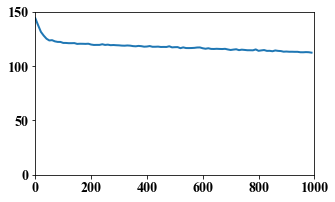

In [142]:
fig = plt.figure(figsize=(5,3))
plt.plot(history['loss'].values(), linewidth=2)
# plt.plot(history['val_loss'].values())
n_values = len(history['loss'].values())
plt.ylim(0,150)
plt.xlim(0,100)
xticks = np.linspace(0, n_values, 6)
xlabels = np.linspace(0, 10*n_values, 6)
plt.xticks(xticks, xlabels.astype(int))
plt.margins(x=0)

m (50, 10, 1)


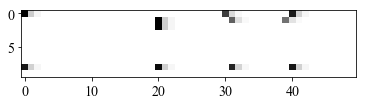

m (50, 10, 1)


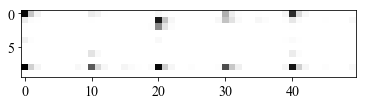

m (50, 10, 1)


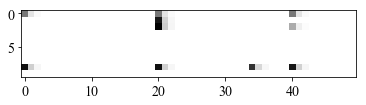

m (50, 10, 1)


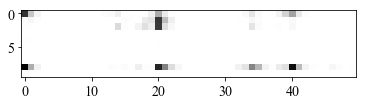

In [33]:
i,j = 240, 30
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

m (40, 10, 1)


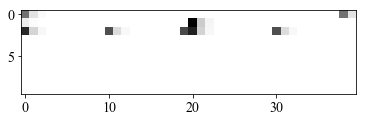

m (40, 10, 1)


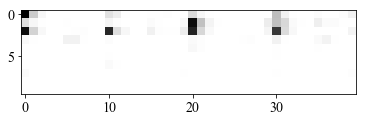

In [34]:
x_ = generator.predict(encoder.predict(x_train[:10]))
plot.single(x_train[0,:40])
plot.single(x_[0,:40])

m (50, 10, 1)


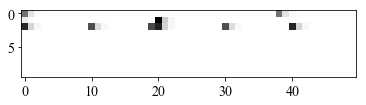

m (50, 10, 1)


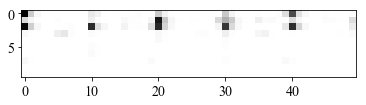

m (50, 10, 1)


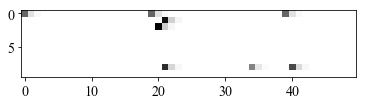

m (50, 10, 1)


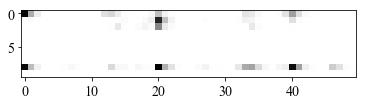

In [35]:
i,j = 0, 10

m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [36]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [37]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [38]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [39]:
# # build a model to project inputs on the latent space
# encoder = Model(encoder_input, z_mean)

In [40]:
# generator_input = Input((latent_dim,))
# generator_layers_ = utils.composition(decoders, generator_input)
# generator = Model(generator_input, generator_layers_)

In [41]:
decoder = generator

## Style transfer

In [42]:
import sklearn.feature_selection
import sklearn.ensemble

In [43]:
# pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [44]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [45]:
# a = list({3:[2],'s':[3,3]}.keys())
# np.random.shuffle(a)
# a

In [46]:
import transformation_extraction

In [47]:
d = {'a':3, 'b':2}
dd = np.array(list(d.keys()))

In [48]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genre_dict, amt1=1000, amt2=1, v=1)


0
Genre A: 03 Traditional Pop/02 Frankies Girl 116BPM
  genre B: 	02 Blues/06 Vidar Vega 70BPM (len: 7)
 	 i: 9, importance: 0.413460

1
Genre A: 03 Traditional Pop/08 Cecil Cee 101BPM
  genre B: 	04 Country/09 Broonze 122BPM (len: 7)
 	 i: 9, importance: 0.263046

2
Genre A: 07 Indie/11 Disco Dancer 135BPM
  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 9, importance: 0.197428

3
Genre A: 02 Blues Rock/03 Fire 148BPM
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 6, importance: 0.299460

4
Genre A: 04 Country/05 Brewer 160BPM
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 2, importance: 0.243571

5
Genre A: 03 Traditional Pop/10 Frewild 152BPM
  genre B: 	05 Jazz/09 West Coast 152BPM Brushes (len: 7)
 	 i: 0, importance: 0.386147

6
Genre A: 04 Country/03 Straight 72BPM Brushes
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 0, importance: 0.294083

7
Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	01 Rock'n'Roll/06 Moon

  genre B: 	06 Soul - Funk/08 Rim Soul 90BPM (len: 7)
 	 i: 0, importance: 0.411057

64
Genre A: 04 Country/09 Broonze 122BPM
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 0, importance: 0.153918

65
Genre A: 07 Indie/09 Slow Shuffle 80BPM
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 9, importance: 0.174331

66
Genre A: 01 Rock'n'Roll/09 Diddeley 185bpm
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 5, importance: 0.210992

67
Genre A: 03 Traditional Pop/06 Bopop 130MPM
  genre B: 	01 Rock'n'Roll/10 Ottis 172bpm (len: 7)
 	 i: 8, importance: 0.319961

68
Genre A: 01 Rock n Roll/05 Diamond 164BPM
  genre B: 	07 Indie/18 Disco Weirdo 146BPM (len: 7)
 	 i: 9, importance: 0.262444

69
Genre A: 02 Blues/02 Nappy Brown 160BPM
  genre B: 	05 Jazz/01 Amel 85BPM Brushes (len: 7)
 	 i: 6, importance: 0.377669

70
Genre A: 02 Blues/07 Straight 88BPM
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 9, importance: 0.266682

71
Genre A: 01 Rock'n'Roll/04 May

  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 2, importance: 0.342851

128
Genre A: 03 Jazz/01 Swing 150BPM Triplets
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 4, importance: 0.309402

129
Genre A: 04 Country/01 Calvin 148BPM
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 0, importance: 0.295639

130
Genre A: 01 Rock'n'Roll/08 Doowoop 140bpm
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 8, importance: 0.330800

131
Genre A: 07 Indie/12 Sticks Up 155BPM
  genre B: 	02 Blues/08 Sams 127BPM (len: 7)
 	 i: 2, importance: 0.205293

132
Genre A: 07 Indie/10 Chilled 120BPM
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 1, importance: 0.266631

133
Genre A: 03 Traditional Pop/07 Lester Lee 133BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 2, importance: 0.175734

134
Genre A: 07 Indie/01 Rock Shuffle 130BPM
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 0, importance: 0.224341

135
Genre A: 05 Jazz/06 Nucleus

  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 9, importance: 0.296220

192
Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	03 Jazz/03 Gipsy 218BPM Triplets (len: 10)
 	 i: 7, importance: 0.157753

193
Genre A: 05 Jazz/06 Nucleus 172BPM Brushes
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 0, importance: 0.365786

194
Genre A: 07 Indie/04 Titanic 97BPM
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 0, importance: 0.184159

195
Genre A: 01 Rock'n'Roll/04 Maybelline 233BPM
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 9, importance: 0.235211

196
Genre A: 07 Indie/15 Tribal Shuffle 123BPM
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 1, importance: 0.235497

197
Genre A: 03 Traditional Pop/10 Frewild 152BPM
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 7, importance: 0.216584

198
Genre A: 03 Jazz/01 Swing 150BPM Triplets
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 8, importance: 0.230802

199
Genr

  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 0, importance: 0.324862

257
Genre A: 04 Country/05 Brewer 160BPM
  genre B: 	02 Blues/02 Nappy Brown 160BPM (len: 7)
 	 i: 6, importance: 0.365147

258
Genre A: 06 Soul - Funk/07 Ride Swing 95Bpm
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 5, importance: 0.355732

259
Genre A: 01 Rock'n'Roll/09 Diddeley 185bpm
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 1, importance: 0.251968

260
Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	01 Rock n Roll/05 Diamond 164BPM (len: 15)
 	 i: 0, importance: 0.160195

261
Genre A: 01 Rock n Roll/10 Uptime 112BPM
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 1, importance: 0.316971

262
Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 2, importance: 0.256814

263
Genre A: 03 Traditional Pop/08 Cecil Cee 101BPM
  genre B: 	07 Indie/05 Halftime 71BPM (len: 7)
 	 i: 5, importance: 0.200607

26

  genre B: 	07 Indie/03 Moon 137BPM (len: 7)
 	 i: 9, importance: 0.241603

321
Genre A: 03 Jazz/01 Swing 150BPM Triplets
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 0, importance: 0.230060

322
Genre A: 07 Indie/16 Medium Flow 120BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 2, importance: 0.282692

323
Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 7, importance: 0.241833

324
Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 8, importance: 0.149036

325
Genre A: 02 Blues/01 Booze 92BPM
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 2, importance: 0.284024

326
Genre A: 04 Country/01 Calvin 148BPM
  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 0, importance: 0.357566

327
Genre A: 01 Rock'n'Roll/02 Gogo 191BPM
  genre B: 	03 Jazz/03 Gipsy 218BPM Triplets (len: 10)
 	 i: 9, importance: 0.294913

328
Genre A: 07 Indie/19 Dis

  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 6, importance: 0.358303

384
Genre A: 05 Jazz/02 Another You 170BPM
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 3, importance: 0.293898

385
Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 0, importance: 0.362481

386
Genre A: 01 Rock'n'Roll/10 Ottis 172bpm
  genre B: 	03 Jazz/03 Gipsy 218BPM Triplets (len: 10)
 	 i: 4, importance: 0.215816

387
Genre A: 01 Rock'n'Roll/04 Maybelline 233BPM
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 9, importance: 0.233877

388
Genre A: 03 Traditional Pop/05 Your Eyes 80BPM
  genre B: 	07 Indie/01 Rock Shuffle 130BPM (len: 7)
 	 i: 2, importance: 0.154972

389
Genre A: 01 Rock'n'Roll/01 Dancin Rick 166BPM
  genre B: 	07 Indie/11 Disco Dancer 135BPM (len: 7)
 	 i: 0, importance: 0.211239

390
Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 4, import

  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 5, importance: 0.179800

449
Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	05 Jazz/01 Amel 85BPM Brushes (len: 7)
 	 i: 9, importance: 0.243817

450
Genre A: 06 Soul - Funk/06 JB Groove 115BPM
  genre B: 	02 Blues/06 Vidar Vega 70BPM (len: 7)
 	 i: 9, importance: 0.383820

451
Genre A: 05 Jazz/09 West Coast 152BPM Brushes
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 4, importance: 0.311776

452
Genre A: 01 Rock'n'Roll/04 Maybelline 233BPM
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 9, importance: 0.367000

453
Genre A: 06 Soul - Funk/04 GoGo Soul 100BPM
  genre B: 	04 Country/04 Snarey 208BPM 3-4 (len: 7)
 	 i: 0, importance: 0.242431

454
Genre A: 03 Traditional Pop/10 Frewild 152BPM
  genre B: 	05 Jazz/06 Nucleus 172BPM Brushes (len: 7)
 	 i: 0, importance: 0.389524

455
Genre A: 07 Indie/12 Sticks Up 155BPM
  genre B: 	07 Indie/11 Disco Dancer 135BPM (len: 7)
 	 i: 7, importance: 0.2

  genre B: 	07 Indie/13 Mid Groover 111BPM (len: 7)
 	 i: 2, importance: 0.178483

513
Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 4, importance: 0.148939

514
Genre A: 02 Blues Rock/07 Ballad 77BPM
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 4, importance: 0.298457

515
Genre A: 07 Indie/16 Medium Flow 120BPM
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 1, importance: 0.301757

516
Genre A: 04 Country/07 Trainy 100BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 1, importance: 0.181642

517
Genre A: 06 Soul - Funk/10 Syncopated Ride 128BPM
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 3, importance: 0.230156

518
Genre A: 01 Rock'n'Roll/03 Lips n Hips 152BPM
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 6, importance: 0.399952

519
Genre A: 01 Rock'n'Roll/10 Ottis 172bpm
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 4, importance: 0.243420

520
Genre A: 02 Blues/

  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 4, importance: 0.148612

577
Genre A: 02 Blues Rock/03 Fire 148BPM
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 6, importance: 0.406937

578
Genre A: 03 Jazz/03 Gipsy 218BPM Triplets
  genre B: 	01 Rock n Roll/05 Diamond 164BPM (len: 15)
 	 i: 8, importance: 0.179456

579
Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	07 Indie/13 Mid Groover 111BPM (len: 7)
 	 i: 5, importance: 0.202135

580
Genre A: 02 Blues Rock/02 Sixeight 58BPM
  genre B: 	02 Blues Rock/01 Clutch 90BPM Triplets (len: 15)
 	 i: 0, importance: 0.332040

581
Genre A: 02 Blues/04 Mickeys 212BPM 12-8

582
Genre A: 05 Jazz/02 Another You 170BPM
  genre B: 	06 Soul - Funk/06 JB Groove 115BPM (len: 7)
 	 i: 0, importance: 0.335705

583
Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 6, importance: 0.327748

584
Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	05 Jazz/02 Another You 170BPM (le

  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 2, importance: 0.188473

642
Genre A: 02 Blues Rock/09 Bluesballad 97BPM
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 0, importance: 0.360930

643
Genre A: 03 Traditional Pop/07 Lester Lee 133BPM
  genre B: 	07 Indie/11 Disco Dancer 135BPM (len: 7)
 	 i: 7, importance: 0.162993

644
Genre A: 04 Country/01 Calvin 148BPM
  genre B: 	07 Indie/01 Rock Shuffle 130BPM (len: 7)
 	 i: 0, importance: 0.362096

645
Genre A: 01 Rock n Roll/08 Offkick 182BPM
  genre B: 	02 Blues Rock/07 Ballad 77BPM (len: 15)
 	 i: 5, importance: 0.204087

646
Genre A: 03 Traditional Pop/09 Distel 155BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 6, importance: 0.166812

647
Genre A: 05 Jazz/06 Nucleus 172BPM Brushes
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 0, importance: 0.392214

648
Genre A: 06 Soul - Funk/09 Smooth Soul 81BPM
  genre B: 	02 Blues/03 Noton Bull 192BPM 12-8 Brushes (len: 7)
 	 i: 0, impo

  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 9, importance: 0.413600

705
Genre A: 06 Soul - Funk/03 Cadence Soul 105BPM
  genre B: 	01 Rock'n'Roll/10 Ottis 172bpm (len: 7)
 	 i: 0, importance: 0.299611

706
Genre A: 02 Blues Rock/05 Bluesshuffle 116BPM
  genre B: 	05 Jazz/01 Amel 85BPM Brushes (len: 7)
 	 i: 9, importance: 0.249456

707
Genre A: 03 Traditional Pop/01 Fly High 115BPM
  genre B: 	06 Soul - Funk/06 JB Groove 115BPM (len: 7)
 	 i: 1, importance: 0.332677

708
Genre A: 02 Blues/07 Straight 88BPM
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 5, importance: 0.199242

709
Genre A: 07 Indie/01 Rock Shuffle 130BPM
  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 2, importance: 0.193292

710
Genre A: 04 Country/08 Eddie Ed 111BPM
  genre B: 	01 Rock n Roll/01 Shuffle 186BPM (len: 15)
 	 i: 8, importance: 0.254090

711
Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	07 Indie/04 Titanic 97BPM (len: 7)
 	 i: 1, importance: 0.257704

712

  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 1, importance: 0.252588

768
Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 8, importance: 0.331137

769
Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 0, importance: 0.180869

770
Genre A: 03 Traditional Pop/08 Cecil Cee 101BPM
  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 9, importance: 0.256439

771
Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 8, importance: 0.239683

772
Genre A: 06 Soul - Funk/02 Boogaloo 120BPM
  genre B: 	06 Soul - Funk/07 Ride Swing 95Bpm (len: 7)
 	 i: 1, importance: 0.173748

773
Genre A: 06 Soul - Funk/01 Soul Groove 107BPM
  genre B: 	06 Soul - Funk/06 JB Groove 115BPM (len: 7)
 	 i: 0, importance: 0.266960

774
Genre A: 04 Country/04 Snarey 208BPM 3-4
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 7, importance: 0.352880



  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 2, importance: 0.221462

833
Genre A: 01 Rock'n'Roll/07 Thwag 170BPM
  genre B: 	07 Indie/11 Disco Dancer 135BPM (len: 7)
 	 i: 6, importance: 0.258065

834
Genre A: 03 Traditional Pop/04 Love 155BPM
  genre B: 	02 Blues/02 Nappy Brown 160BPM (len: 7)
 	 i: 6, importance: 0.316843

835
Genre A: 01 Rock n Roll/07 Domino 167BPM
  genre B: 	01 Rock'n'Roll/03 Lips n Hips 152BPM (len: 7)
 	 i: 9, importance: 0.224790

836
Genre A: 02 Blues Rock/03 Fire 148BPM
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 0, importance: 0.224646

837
Genre A: 02 Blues/05 Cadillac 128BPM
  genre B: 	06 Soul - Funk/05 Hip Hop 95BPM (len: 7)
 	 i: 0, importance: 0.319322

838
Genre A: 05 Jazz/09 West Coast 152BPM Brushes
  genre B: 	02 Blues Rock/07 Ballad 77BPM (len: 15)
 	 i: 0, importance: 0.429246

839
Genre A: 03 Traditional Pop/10 Frewild 152BPM
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 0, importance: 0.287578

840
Genre A

  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 7, importance: 0.231770

898
Genre A: 02 Blues/10 Bogeart 122BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 7, importance: 0.233597

899
Genre A: 03 Traditional Pop/04 Love 155BPM
  genre B: 	04 Country/09 Broonze 122BPM (len: 7)
 	 i: 1, importance: 0.186782

900
Genre A: 04 Country/06 Booker 170BPM
  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 1, importance: 0.200703

901
Genre A: 07 Indie/08 Bouncer 162BPM
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 8, importance: 0.235828

902
Genre A: 02 Blues/08 Sams 127BPM
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 0, importance: 0.344366

903
Genre A: 01 Rock n Roll/06 Swingin 132BPM Triplets
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 9, importance: 0.439651

904
Genre A: 01 Rock n Roll/06 Swingin 132BPM Triplets
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 9, importance: 0.239301

905
Genre A

  genre B: 	06 Soul - Funk/05 Hip Hop 95BPM (len: 7)
 	 i: 0, importance: 0.381301

961
Genre A: 07 Indie/05 Halftime 71BPM
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 5, importance: 0.285155

962
Genre A: 01 Rock'n'Roll/07 Thwag 170BPM
  genre B: 	02 Blues Rock/07 Ballad 77BPM (len: 15)
 	 i: 6, importance: 0.233161

963
Genre A: 07 Indie/11 Disco Dancer 135BPM
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 9, importance: 0.241511

964
Genre A: 07 Indie/03 Moon 137BPM
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 6, importance: 0.257457

965
Genre A: 02 Blues Rock/06 Straight 130BPM
  genre B: 	04 Country/02 Marching 94BPM (len: 7)
 	 i: 6, importance: 0.248583

966
Genre A: 01 Rock'n'Roll/03 Lips n Hips 152BPM
  genre B: 	02 Blues/03 Noton Bull 192BPM 12-8 Brushes (len: 7)
 	 i: 2, importance: 0.216530

967
Genre A: 06 Soul - Funk/04 GoGo Soul 100BPM
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 0, importance: 0.349568

968
Genre A: 07

In [49]:
print('avg importance: %f' % np.mean(importances))

avg importance: 0.261890


In [50]:
# list(min_transformations.items())[0]

In [51]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  


Genre `03 Traditional Pop/02 Frankies Girl 116BPM` to: 
 dim:	genre:
 0 	05 Jazz/01 Amel 85BPM Brushes

Genre `03 Traditional Pop/08 Cecil Cee 101BPM` to: 
 dim:	genre:
 0 	05 Jazz/10 Scalis 190BPM 3-4

Genre `07 Indie/11 Disco Dancer 135BPM` to: 
 dim:	genre:
 0 	05 Jazz/08 Neodop 226BPM 3-4

Genre `02 Blues Rock/03 Fire 148BPM` to: 
 dim:	genre:
 6 	07 Indie/07 Rock Keeler 133BPM

Genre `04 Country/05 Brewer 160BPM` to: 
 dim:	genre:
 0 	02 Blues/09 Leroyes 130BPM

Genre `03 Traditional Pop/10 Frewild 152BPM` to: 
 dim:	genre:
 0 	05 Jazz/09 West Coast 152BPM Brushes

Genre `04 Country/03 Straight 72BPM Brushes` to: 
 dim:	genre:
 1 	07 Indie/10 Chilled 120BPM

Genre `01 Rock n Roll/01 Shuffle 186BPM` to: 
 dim:	genre:
 8 	03 Traditional Pop/07 Lester Lee 133BPM

Genre `02 Blues/04 Mickeys 212BPM 12-8` to: 
 dim:	genre:
 9 	07 Indie/03 Moon 137BPM

Genre `04 Country/08 Eddie Ed 111BPM` to: 
 dim:	genre:
 0 	03 Traditional Pop/01 Fly High 115BPM

Genre `02 Blues Rock/10 Uptime 150BPM

(array([275.,  57.,  79.,  20.,  76.,  79., 118.,  57.,  49., 179.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

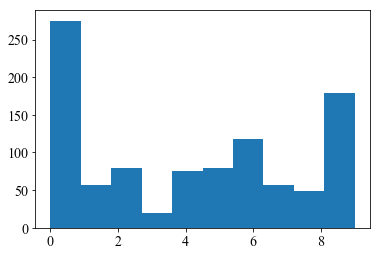

In [52]:
plt.hist(best_dims)

In [53]:
# TODO save as python object (or json)

In [54]:
# def save_transformation_dicts(transformations={}, dn='', v=0):
#     for genre_A, sub_dict in transformations.items():
#         # sub_dict :: {'genre_B_2/genre_B_2': vector}
#         a1, a2 = genre_A.split('/')
#         if a1 not in os.listdir(dn): os.mkdir(dn + a1)
#         if v:
#             print(genre_A)
#             print(sub_dict.keys())
#         io.save_dict(dn + a1, a2, sub_dict)

fn = config.plots_dir + 'transformations-best_dims.pkl'
io.save(best_dims, fn)

fn = config.plots_dir + 'transformations.pkl'
io.save(transformations, fn)

fn = config.plots_dir + 'min_transformations.pkl'
io.save(min_transformations, fn)

'../results/min_transformations.pkl'

In [55]:
t_ = io.load(fn)

In [56]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [57]:
list(transformations.keys())[:3]

['03 Traditional Pop/02 Frankies Girl 116BPM',
 '03 Traditional Pop/08 Cecil Cee 101BPM',
 '07 Indie/11 Disco Dancer 135BPM']

In [58]:
len(transformations.keys())

103